# Question 1

Prove that the given algorithm generates a $Bern(\frac{c_y p_y}{c_x p_x + c_y p_y})$ event.  
Find the probability distribution of the number of iterations it takes to give an output.

Algorithm:

Draw $C_1 \sim Bern(\frac{c_y}{c_x + c_y})$  
if $C_1 = 1:$  
$\hspace{8pt}$ Draw $C_2 \sim Bern(p_y)$  
$\hspace{8pt}$ if $C_2 = 1:$  
$\hspace{8pt}$ $\hspace{8pt}$ output 1  
$\hspace{8pt}$ if $C_2 = 0:$  
$\hspace{8pt}$ $\hspace{8pt}$ repeat from start  
if $C_1 = 0:$  
$\hspace{8pt}$ Draw $C_2 \sim Bern(p_x)$  
$\hspace{8pt}$ if $C_2 = 1:$  
$\hspace{8pt}$ $\hspace{8pt}$ output 0  
$\hspace{8pt}$ if $C_2 = 0:$  
$\hspace{8pt}$ $\hspace{8pt}$ repeat from start

## Solution


Finding the Probability of getting accepted (either as 1 or 0)  
By splitting it into 2 conditionally independent events, sampling from $\frac{c_y}{c_x + c_y}$ and then sampling from either $p_y$ or $p_x$  
$P$(accepted)  
= $\frac{c_y}{c_x+c_y} * p_y + \frac{c_x}{c_x+c_y} * p_x$  
= $\frac{c_y p_y + c_x p_x}{c_x + c_y}$

Thus Probability of getting accepted is $P$(accepted), $Bern(\frac{c_y p_y + c_x p_x}{c_x + c_y})$ 

Now consider Probability of getting a 1, given that it's accepted, which just refers to its distribution  
$Pr$ [getting 1 in the hidden distribution]  
= $Pr$ [getting 1 | accepted]  
= $\frac{\text{Pr[getting 1 and being accepted]}}{\text{Pr[accepted]}}$  
= $\frac{\frac{c_y p_y}{c_x + c_y}}{\frac{c_x p_x + c_y p_y}{c_x + c_y}}$  
= $\frac{c_y p_y}{c_x p_x + c_y p_y}$  
Which clearly is $Bern(\frac{c_y p_y}{c_y p_y + c_x p_x})$

# Question 2

Sample uniformly from a p-dim sphere. Consider $x = (x_1, x_2, \cdots, x_p)$, let ||.|| be Euclidean norm. The pdf of this distribution is:
$$
f(x) = \frac{\Gamma(\frac{p}{2}+1)}{\pi^{p/2}} I\{||x||\le 1\}
$$
Use a uniform p-dim hypercube to sample uniformly from this sphere.  
Implement this for p = 2, 3, 4, 5, 6.  
Observe what happens as p increases.

### Uniform Sampling

In [1]:
function uniform_custom(n=1, seed=time() % 100)
    a = 16807
    mod = 2^31 - 1
    sample = zeros(Float32, n)
    tmp = ((a * seed + 1) % mod)
    # not using the first value
    sample[1] = 2 * (tmp / mod) - 1
    for i in 1:n
        tmp = (tmp * a + 1) % mod
        sample[i] = 2 * (tmp / mod) - 1
    end
    # passing tmp so as to continue the same sequence, if need be
    return sample, tmp
end

uniform_custom (generic function with 3 methods)

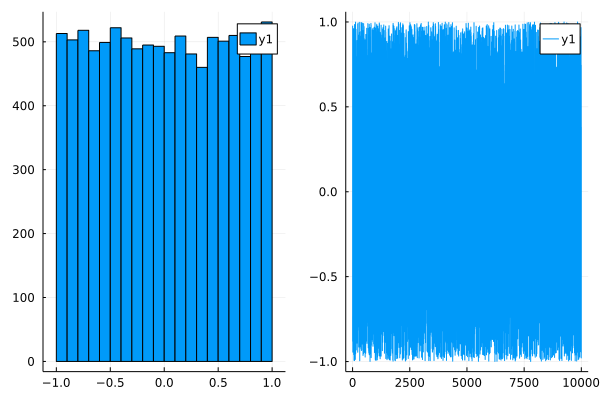

In [175]:
result, tmp = uniform_custom(10000)
p1 = plot(histogram(result))
p2 = plot(result)
plot(p1, p2, layout=(1,2))

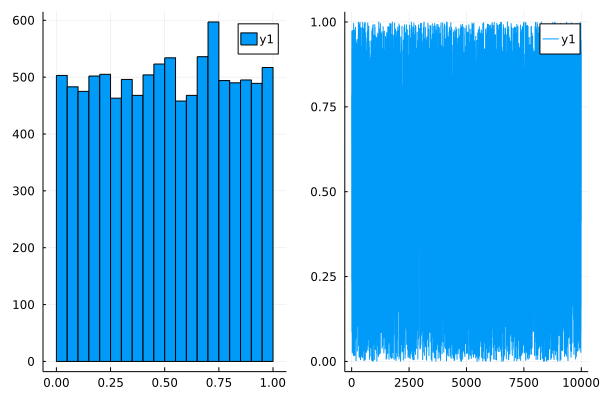

In [176]:
result = rand(10000)
p3 = plot(histogram(result))
p4 = plot(result)
plot(p3, p4, layout=(1,2))

### Imports

In [47]:
using SpecialFunctions
using Plots
using Statistics
using Random

In [3]:
function p_dim_cube_sampler(n, p, seed=time()%100)
    #! not a solution, samples from p-dim hypercube and marks those vectors which come under p-dim sphere
    result = 0
    u_ = zeros(n, p)
    u, tmp = uniform_custom(n*p, seed)
    for i in 1:n
        tmp = u[(i-1)*p+1:i*p]
        u_[i, :] = tmp
        if tmp' * tmp <= 1
            if result == 0
                result = tmp'
            else
                result = [result; tmp']
            end
        end
    end
    return result, u_
end

p_dim_cube_sampler (generic function with 2 methods)

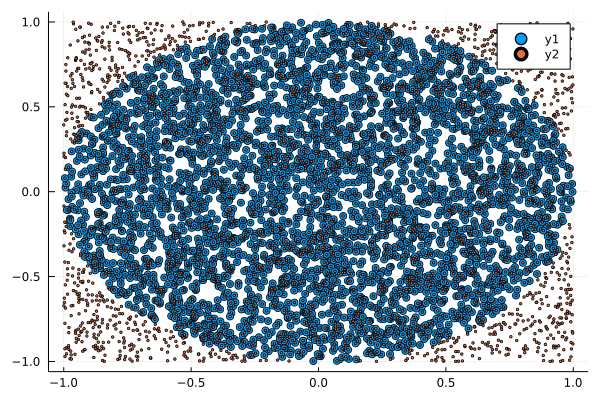

In [4]:
result, u = p_dim_cube_sampler(5000, 2)
plot(result[:, 1], result[:, 2], seriestype=:scatter, markersize=4)
plot!(u[:, 1], u[:, 2], seriestype=:scatter, markersize=1.5)

In [5]:
valid = size(result)[1]
total = size(u)[1]
println(string(valid)*" / "*string(total))
println((size(result)[1])/(size(u)[1]))
println(pi/4)

3956 / 5000
0.7912
0.7853981633974483


In [6]:
function p_dim_sphere_sampler_exac(n, p, seed=time()%100)
    result = zeros(n, p)
    seeds = []
    av_itr = 0
    for i in 1:n
        found = false
        itr = 0
        while !found
            itr += 1
            random_sample, tmp = uniform_custom(p, seed)
            seed = tmp
            if random_sample' * random_sample <= 1
                result[i, :] = random_sample
                append!(seeds, seed)
                found = true
                # println("Found ", i)
                av_itr += itr
            end
        end
    end
    return result, av_itr/n, seeds
end

p_dim_sphere_sampler_exac (generic function with 2 methods)

Average Iterations : 1.231
Predicted Iterations : 1.2732395447351628
1000


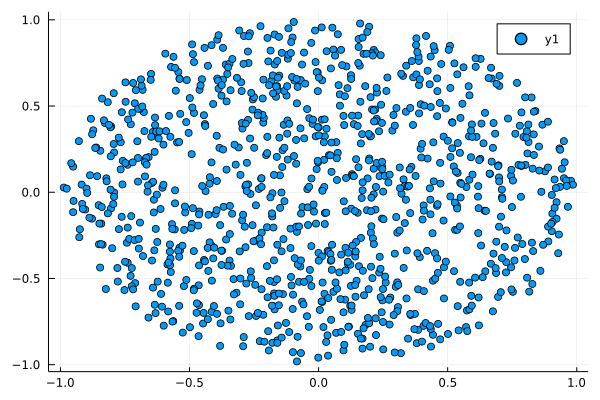

In [7]:
p = 2
result, av_itr, seeds = p_dim_sphere_sampler_exac(1000, p)
println("Average Iterations : ", av_itr)

normalizing_factor_sphere = gamma(1 + p/2)/π^(p/2)
iters = 2^p*normalizing_factor_sphere
println("Predicted Iterations : ", iters)

println(length(unique(seeds)))
plot(result[:, 1], result[:, 2], seriestype=:scatter, markersize=4)

Increasing p would change average number of iterations \
Expected number of iterations: $\{\frac{\text{Volume covered by sphere}}{\text{Volume covered by cube}}\}^{-1}$

# Question 3

Using accept-reject and standard normal proposal, obtain samples from a truncated standard normal distribution with pdf:
$$
f(x) = \frac{1}{\Phi(a) - \Phi(-a)}\frac{1}{\sqrt{2\pi}}e^{-x^2/2} I(-a < x < a)
$$
where $\Phi(\cdot)$ is the CDF of a standard normal distribution. Run for a=4 and a=1. \
What are the differences between the two settings?

### Imports

In [249]:
using Distributions

### Cauchy distribution

In [241]:
# sampling standard cauchy distribution
function cauchy(n, func)
    # custom random function doesn't give actual uniformity, giving more numbers less than 1e-4 than numbers greater than 1-1e-4
    if func == uniform_custom
        u, tmp = uniform_custom(n)
    else
        u = rand(Float64, n)
    end
    threshold = 1e-3
    indices = findall(x -> x<threshold, u)
    # println(size(indices))
    u[indices] .= threshold
    indices = findall(x -> x>1-threshold, u)
    # println(size(indices))
    u[indices] .= 1-threshold

    result = map(v->tan(π*(v-0.5)), u)
    return result
end

cauchy (generic function with 2 methods)

#### if custom uniform sampling is used

it seems the implemented uniform sampling has bias towards sampling more 0s than 1s,
as seen below, 5074 samples are samples below 1e-3, while only 5 above 1-1e-3

(5074,)
(5,)


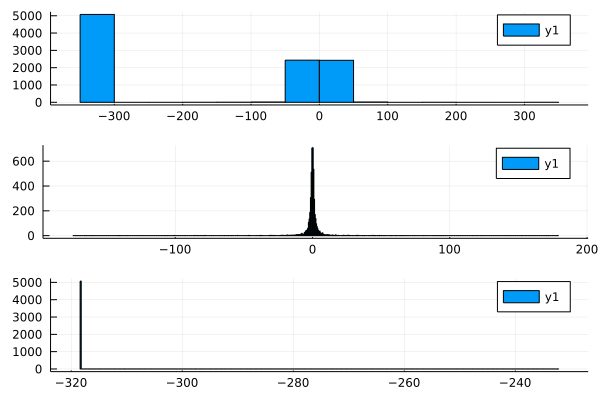

In [238]:
#! With uniform_custom 
# this clearly is inaccurate, as the uniform_custom samples more near 0s than near 1s
result = cauchy(10000, uniform_custom)
# I don't understand why there is an outlier value that's sampled so many times
p2 = plot(histogram(result))
weird = filter(x -> -400<x<-200, result)
result = filter(x -> -200<x<200, result)
p1 = plot(histogram(result))
p3 = plot(histogram(weird))
plot(p2, p1, p3, layout=(3,1))

#### if in-built uniform sampling is used

(12,)
(11,)


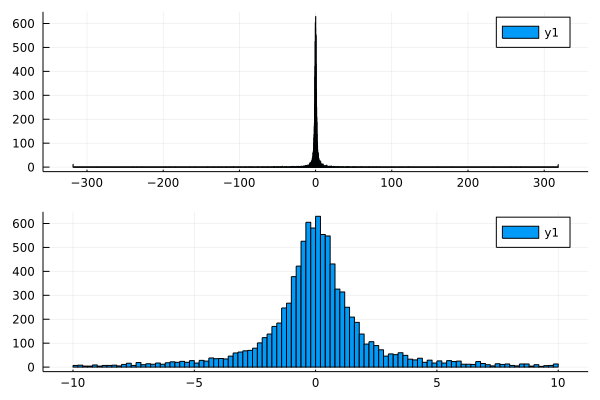

In [191]:
#! With built in uniform sampler
result = cauchy(10000, rand)
p1 = plot(histogram(result))
result = filter(x -> -10<x<10, result)
p2 = plot(histogram(result))
plot(p1, p2, layout=(2,1))

### Standard Normal distribution

In [99]:
# supremum calculation for standard normal - standard cauchy
function sup_nor_cau(x)
    return sqrt(π/2)*(1+x^2)*exp(-x^2/2)
end

sup_nor_cau (generic function with 1 method)

Supremum is 1.5203469010662807


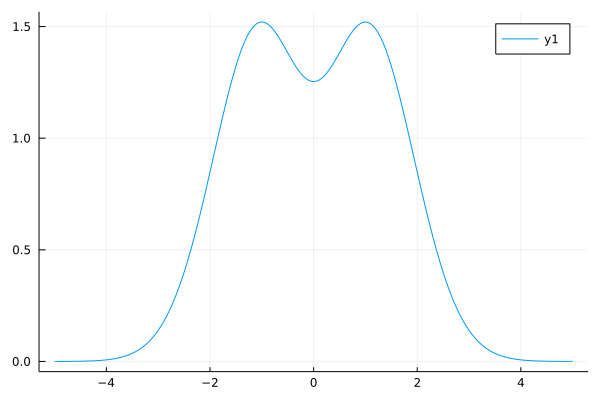

In [106]:
val = zeros(2001)
for (idx, x) in enumerate([-5:0.05:5;])
    val[idx] = sup_nor_cau(x)
end
supremum = maximum(val)
println("Supremum is ", supremum)
plot(-5:0.05:5, val[1:201])

In [219]:
function standard_normal(n, seed=time()%100)
   result = zeros(n)
   av_iters = 0
   supremum = sup_nor_cau(1) + 0.2 # 0.2 buffer
   for i in 1:n
        found = false
        iters = 0
        while !found
            iters += 1
            #! Either this
            # this gives cauchy like distribution
            # u, seed = uniform_custom(1, seed)
            # u = u[1]

            #! or this
            # this gives normal like distribution
            u = rand(Float64, 1)[1]

            propose = cauchy(1, rand)[1]
            check_with = sup_nor_cau(propose)
            if(check_with > supremum)
                throw("Re-estimate Supremum")
            end
            if u <= check_with/supremum
                result[i] = propose
                found = true
                av_iters += iters
            end
        end
    end 
    return result, av_iters/n
end

standard_normal (generic function with 2 methods)

Average iterations : 1.72375
Predicted Iterations : 1.7203469010662806
Mean is 0.005936377448091741
Variance is 0.9957631264209058


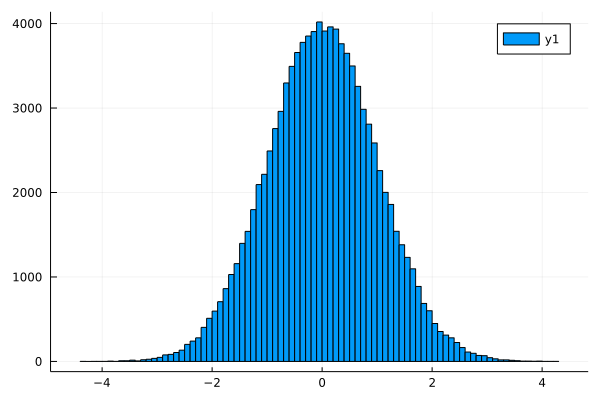

In [242]:
result, av_iters = standard_normal(100000)
println("Average iterations : ", av_iters)
println("Predicted Iterations : ", sup_nor_cau(1) + 0.2) # 0.2 buffer taken before
println("Mean is ", mean(result))
println("Variance is ", var(result))
plot(histogram(result))

### Truncated Standard Normal distribution

In [226]:
function truncated_standard_normal(n, a, seed=time()%100)
    result = zeros(n)
    av_iters = 0

    for i in 1:n
        found = false
        itr = 0
        while !found
            gauss, itrs = standard_normal(1)
            gauss = gauss[1]
            itr += itrs
            if -a<=gauss<=a
                result[i] = gauss
                found = true
                av_iters += itr
            end
        end
    end
    return result, av_iters/n
end

truncated_standard_normal (generic function with 2 methods)

Average Iterations : 1.72561
Predicted Iterations : 1.7203469010662806


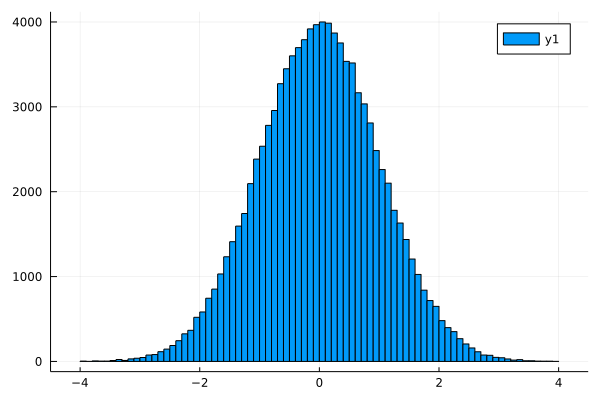

In [247]:
result, av_iters = truncated_standard_normal(100000, 4)
println("Average Iterations : ", av_iters)
println("Predicted Iterations : ", sup_nor_cau(1) + 0.2) # nearly same as the standard normal
plot(histogram(result))

Average Iterations : 2.51105


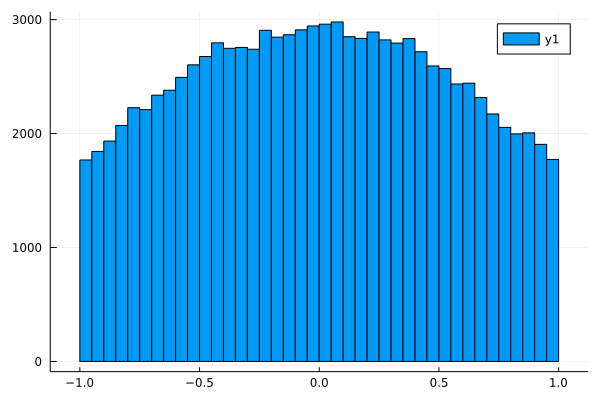

In [234]:
result, av_iters = truncated_standard_normal(100000, 1)
println("Average Iterations : ", av_iters)
plot(histogram(result))